In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
uploaded= files.upload()

Saving classData.csv to classData (2).csv


In [4]:
df = pd.read_csv('classData.csv')

In [5]:
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


## no missing values

In [6]:
df.isnull().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

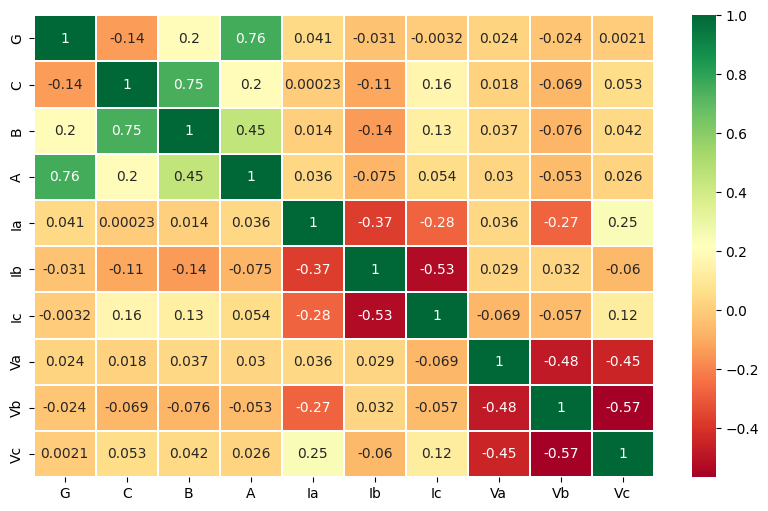

In [71]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='RdYlGn', linewidth=0.3, annot=True);


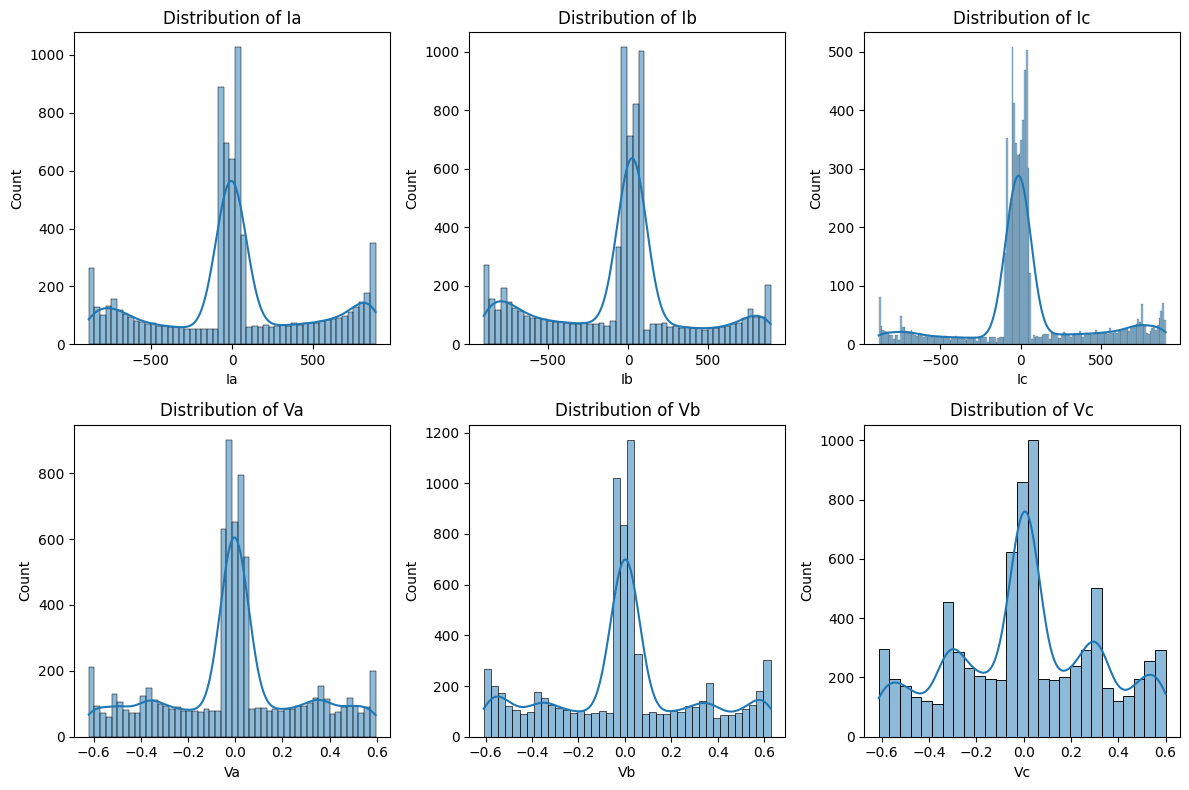

In [8]:
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

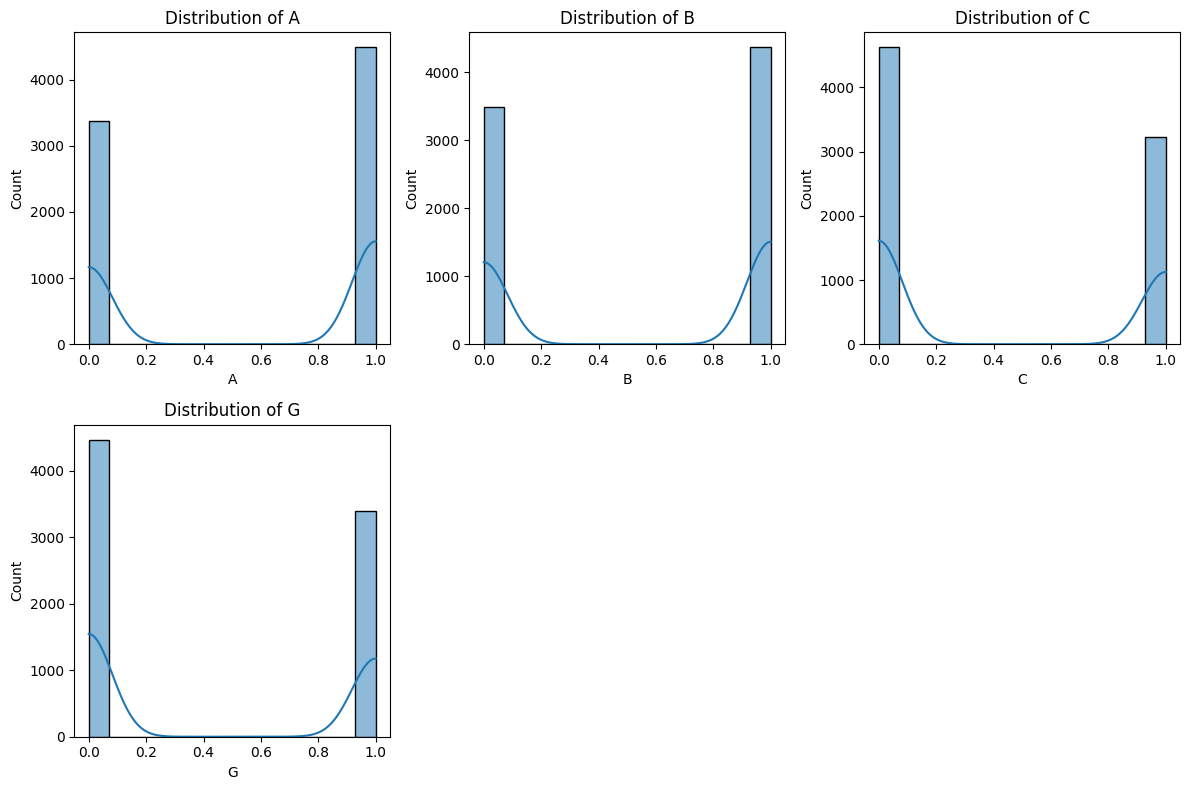

In [9]:
features = ['A','B','C','G']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [10]:
y=df[['G','C','B','A']]

In [11]:
y

,G,C,B,A
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
7856,0,0,0,0
7857,0,0,0,0
7858,0,0,0,0
7859,0,0,0,0


In [12]:
x=df[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]

In [13]:
x


,Ia,Ib,Ic,Va,Vb,Vc
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [14]:
u=np.mean(x,axis=0)
std=np.std(x,axis=0)

In [15]:
x=(x-u)/std

In [16]:
x

,Ia,Ib,Ic,Va,Vb,Vc
0,-0.355087,0.080065,0.138534,1.412563,-0.427823,-0.891036
1,-0.752955,-0.071573,-0.043288,1.108142,-0.398144,-0.635362
2,-1.111683,-0.295516,-0.310757,0.945574,-0.368368,-0.513005
3,-1.307612,-0.393538,-0.429241,0.841062,-0.338502,-0.445259
4,-1.414607,-0.408236,-0.449158,0.751228,-0.308553,-0.391383
...,...,...,...,...,...,...
7856,-0.172062,0.189650,-0.025547,0.353085,-1.764967,1.465137
7857,-0.171226,0.187393,-0.023921,0.385448,-1.775071,1.445031
7858,-0.170359,0.185131,-0.022329,0.417711,-1.784724,1.424558
7859,-0.169462,0.182866,-0.020771,0.449868,-1.793923,1.403724


In [17]:
xtrain=x[:7500]
xtest=x[7500:]
ytrain=y[:7500]
ytest=y[7500:]

In [18]:
xtrain= xtrain.values
xtest= xtest.values
ytrain= ytrain.values
ytest= ytest.values

In [19]:
xtrain =xtrain.reshape(xtrain.shape[0],xtrain.shape[1] , 1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1] , 1)

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM , Dropout

In [21]:
model=keras.Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(6,1),activation="relu"))
model.add(LSTM(60,return_sequences=True,activation="relu"))
model.add(LSTM(60,activation="relu"))
model.add(Dense(4,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [22]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=70,batch_size=64,verbose=1)

Epoch 1/70
118/118 [==============================] - 10s 25ms/step - loss: 0.5689 - val_loss: 0.1896
Epoch 2/70
118/118 [==============================] - 2s 19ms/step - loss: 0.3573 - val_loss: 0.1078
Epoch 3/70
118/118 [==============================] - 2s 21ms/step - loss: 0.2733 - val_loss: 0.1119
Epoch 4/70
118/118 [==============================] - 3s 28ms/step - loss: 0.2534 - val_loss: 0.0576
Epoch 5/70
118/118 [==============================] - 3s 29ms/step - loss: 0.2291 - val_loss: 0.0492
Epoch 6/70
118/118 [==============================] - 2s 19ms/step - loss: 0.2156 - val_loss: 0.0516
Epoch 7/70
118/118 [==============================] - 2s 20ms/step - loss: 0.2020 - val_loss: 0.0809
Epoch 8/70
118/118 [==============================] - 2s 20ms/step - loss: 0.1947 - val_loss: 0.0215
Epoch 9/70
118/118 [==============================] - 2s 21ms/step - loss: 0.1810 - val_loss: 0.0093
Epoch 10/70
118/118 [==============================] - 4s 33ms/step - loss: 0.1801 - val_l

In [23]:
#test_predict=model.predict(xtest)

12/12 [==============================] - 1s 5ms/step


In [24]:
for i in range (len(test_predict)):
    print(test_predict[i],ytest[i])

[3.1817849e-03 9.0881404e-05 2.2370220e-04 2.6799482e-03] [0 0 0 0]
[0.00284184 0.00011124 0.00025577 0.00237931] [0 0 0 0]
[0.00257122 0.00013644 0.0002939  0.00213877] [0 0 0 0]
[0.00235601 0.00016768 0.0003394  0.0019458 ] [0 0 0 0]
[0.00219936 0.00020315 0.0003894  0.00180421] [0 0 0 0]
[0.00209459 0.0002421  0.00044322 0.00170786] [0 0 0 0]
[0.00201536 0.0002893  0.00050713 0.00163224] [0 0 0 0]
[0.00196192 0.00034166 0.00057629 0.00157942] [0 0 0 0]
[0.00192368 0.00040048 0.00065238 0.00153995] [0 0 0 0]
[0.00187093 0.00047357 0.00074337 0.00148854] [0 0 0 0]
[0.0018223  0.00056007 0.00084662 0.00144025] [0 0 0 0]
[0.0017826  0.00066562 0.00096754 0.0013973 ] [0 0 0 0]
[0.00174496 0.00078746 0.00110342 0.0013565 ] [0 0 0 0]
[0.00167673 0.0009206  0.0012447  0.00129368] [0 0 0 0]
[0.00167522 0.00100366 0.00133083 0.00129016] [0 0 0 0]
[0.00194379 0.00089798 0.00122214 0.00150934] [0 0 0 0]
[0.00227674 0.00080779 0.00113083 0.00178094] [0 0 0 0]
[0.00270734 0.00072796 0.00105187 0.

In [26]:
xtest=np.array(xtest)
ytest=np.array(ytest)

In [27]:
loss= model.evaluate(xtest,ytest)

12/12 [==============================] - 0s 6ms/step - loss: 0.0090


In [28]:
loss

0.008971684612333775

In [29]:
ip=np.array([-0.752955,	-0.071573,	-0.043288,	1.108142,	-0.398144,	-0.635362])

In [30]:
ip =ip.reshape(1,6 , 1)

In [31]:
model.predict(ip)

1/1 [==============================] - 0s 26ms/step


array([[1.0000000e+00, 4.2650194e-05, 7.3775318e-03, 1.0000000e+00]],
      dtype=float32)

In [32]:
ytrain[2]

array([1, 0, 0, 1])

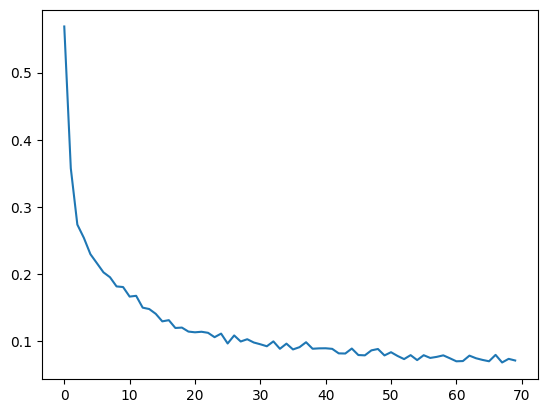

In [33]:
plt.plot(history.history["loss"])

In [34]:
for i in range(len(test_predict)):
   for j in range(4):
    if test_predict[i][j]>=0.5:
      test_predict[i][j]=1
    else:
      test_predict[i][j]=0


In [35]:
test_predict

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [36]:
for i in range (len(test_predict)):
    print(test_predict[i],ytest[i])

[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0 0 0 0]
[0. 0. 0. 0.] [0

In [58]:
def accuracy(pred,labels):
  a=0
  for i in range(len(test_predict)):
       if test_predict[i].all()==ytest[i].all():
           a=a+1
       else:
            continue
  return a/len(test_predict)

In [59]:
accuracy(test_predict, ytest)

1.0

In [60]:
model.save('/content/drive/MyDrive/electricfault.h5')

In [61]:
u

Ia    13.721194
Ib   -44.845268
Ic    34.392394
Va    -0.007667
Vb     0.001152
Vc     0.006515
dtype: float64

In [62]:
std

Ia    464.712110
Ib    439.241255
Ic    371.083807
Va      0.289132
Vb      0.313417
Vc      0.307878
dtype: float64

In [63]:
u=np.array(u)

In [64]:
u

array([ 1.37211943e+01, -4.48452685e+01,  3.43923943e+01, -7.66709002e-03,
        1.15210285e-03,  6.51498717e-03])

In [65]:
std=np.array(std)
std

array([4.64712110e+02, 4.39241255e+02, 3.71083807e+02, 2.89131799e-01,
       3.13417112e-01, 3.07877546e-01])